# Global Terrorism Data



## Goal: Build a model that can predict what group may have been responsible for an incident. 

# The notebook is divided into 2 parts:
## 1. Exploratory Data Analysis: Visualization
## 2. Predicting  group using RNN_LSTM

    

In [165]:
import matplotlib.pyplot as plt; plt.rcdefaults()
from sklearn.cross_validation import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns; sns.set()
from __future__ import print_function

import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset
import keras
from keras.utils import to_categorical
from keras import models
from keras import layers

Using TensorFlow backend.


In [314]:
#Setting up current working directory

os.chdir('/Users/urvashijaitley/Desktop')
print(os.getcwd())

/Users/urvashijaitley/Desktop


In [305]:
#Reading whole data sheet as pandas dataframe

df = pd.read_excel('globalterrorismdb_0718dist.xlsx')
print(df.info())





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: datetime64[ns](1), float64(55), int64(22), object(57)
memory usage: 187.1+ MB
None


In [307]:
#Renaming the columns
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country',
                     'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target',
                     'nkill':'Killed','nwound':'Wounded','gname':'Group',
                     'targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

#Selecting few columns for analysis
          
df1 = df[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType',
             'Killed','Wounded','Target','Group','Target_type','Weapon_type','Motive']]
          
#Creating new column by merging 2 columns
df1['casualities'] = df1['Killed']+df1['Wounded']

/Users/urvashijaitley/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


# Part1: Exploratory Data Analysis

/Users/urvashijaitley/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


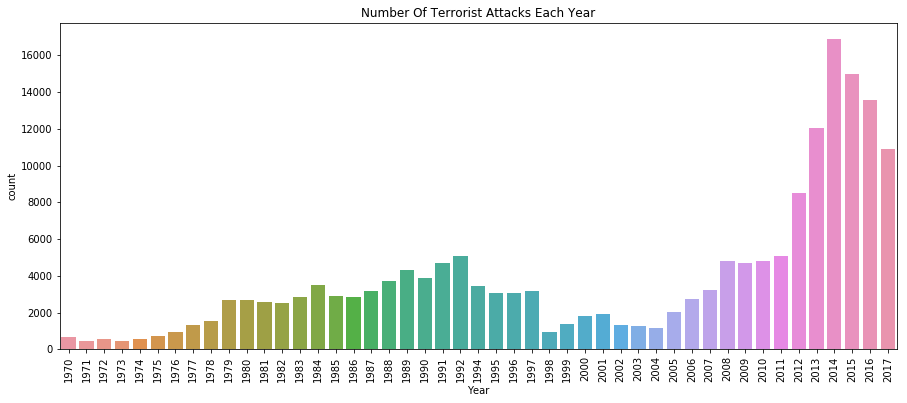

In [34]:
#Terrorist Attack Over Time

plt.subplots(figsize=(15,6))
sns.countplot(x = 'Year',data=df1)
#ns.countplot(x="class", data=titanic)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Attacks Each Year')
plt.show()

'''From below graph we can see that from 2005, incidents of attack have increased. This may be due to on-going war,
and border issues  between various contries.
Also, number of attacks have increased from 1970, that may have correlation with increase in population'''

/Users/urvashijaitley/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


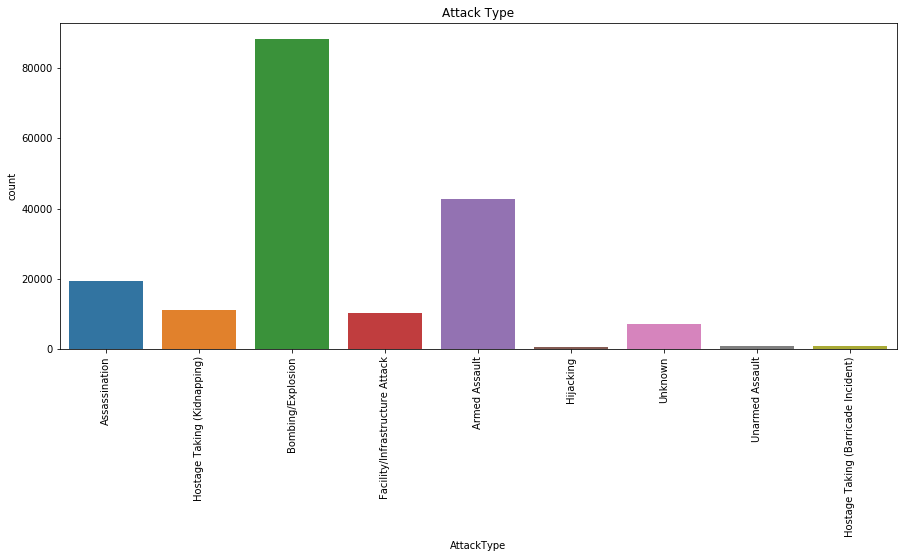

In [35]:
#Attack Type
plt.subplots(figsize=(15,6))
sns.countplot(x = 'AttackType',data=df1)
plt.xticks(rotation=90)
plt.title('Attack Type')
plt.show()

'''From below graph we can see that Bombing and Explosion is the top choice of attacker, followed by Armed Assault.
With this information in hand, goverment can pass stricter law for explosive material bussiness, to control the attacks'''

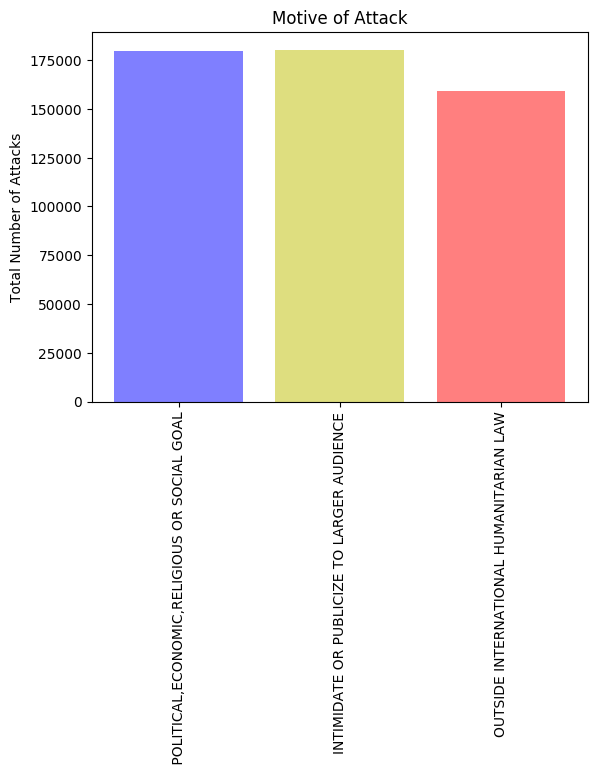

In [42]:


#Attack Motive
#Motive column have text data. So, it will not be feasible to plot the data on graph.
#Instead 3 columns (crit1, crit2, crit3)  corresponding to motive can be used
criteria1_count = df['crit1'].sum()
criteria2_count = df['crit2'].sum()
criteria3_count = df['crit3'].sum()
 
objects = (' POLITICAL,ECONOMIC,RELIGIOUS OR SOCIAL GOAL', 'INTIMIDATE OR PUBLICIZE TO LARGER AUDIENCE', 'OUTSIDE INTERNATIONAL HUMANITARIAN LAW')
y_pos = np.arange(len(objects))
performance = [criteria1_count,criteria2_count,criteria3_count]
 
plt.bar(y_pos, performance, align='center', alpha=0.5, color= {'b','r','y'})
plt.xticks(y_pos, objects)
plt.xticks(rotation=90)
plt.ylabel('Total Number of Attacks')
plt.title('Motive of Attack')
 
plt.show()
'''From the above graph we can see that main motive of attacks was to INTIMIDATE OR PUBLICIZE TO LARGER AUDIENCE
followed by POLITICAL,ECONOMIC,RELIGIOUS OR SOCIAL GOAL'''

/Users/urvashijaitley/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


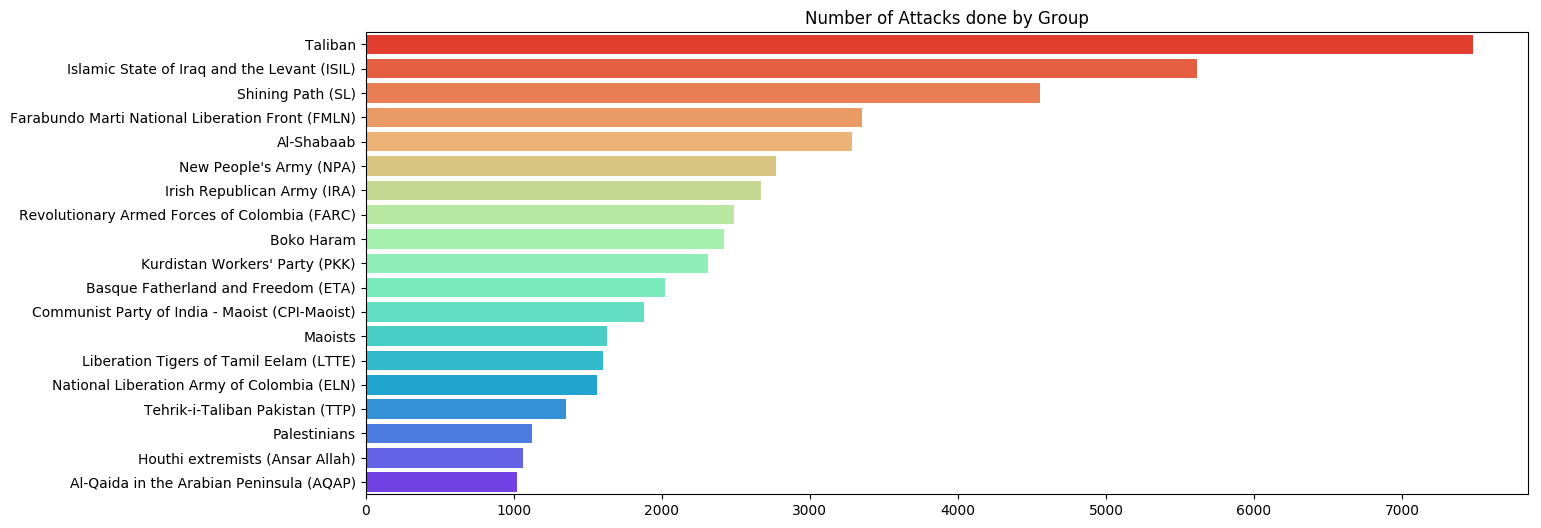

'From below graph we can infer that Taliban, Islamic State of Iraq and Shining Path are the most active groups'

In [142]:
#Attacks distribution by Group
plt.subplots(figsize=(15,6))
sns.barplot(x = df['Group'].value_counts()[1:20].values, y = df['Group'].value_counts()[1:20].index, palette = 'rainbow_r')
plt.title('Number of Attacks done by Group')
plt.show()

'''From below graph we can infer that Taliban, Islamic State of Iraq and Shining Path are the most active groups'''

In [67]:
print ('Country with Highest Terrorist Attacks:',df1['Country'].value_counts().index[0])
print ('Regions with Highest Terrorist Attacks:',df1['Region'].value_counts().index[0])
df = (df1.groupby(['Country']).sum())
print ('Country with Highest Casualities:',df.sort_values(by = ['casualities'],ascending=[False]).index[0])

Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Country with Highest Casualities: Iraq


/Users/urvashijaitley/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


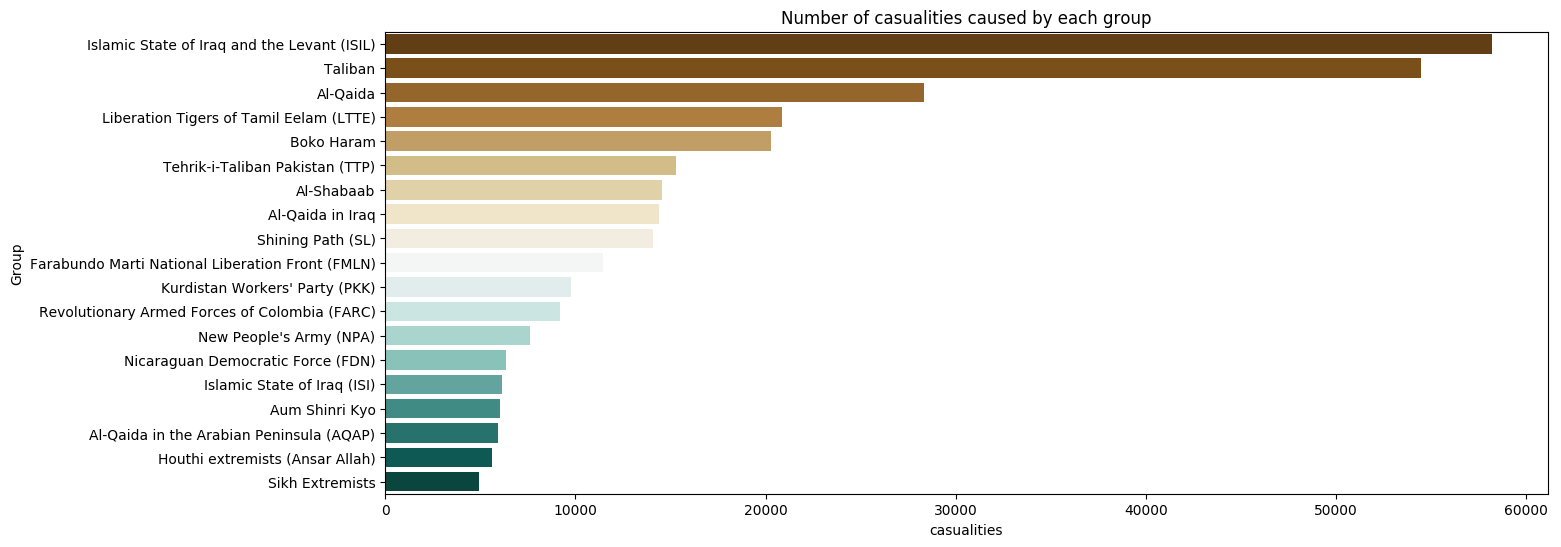

In [141]:
#Number of people died or Wounded
plt.subplots(figsize=(15,6))
data_group = df1.groupby(['Group']).sum()
data_group = data_group.sort_values(by = ['casualities'], ascending = False)
sns.barplot (data_group['casualities'][1:20],data_group.index[1:20],palette = 'BrBG')
plt.title('Number of casualities caused by each group')
plt.show()

#From below graph we can see that people were effected most by Islamic State of Irag and the Levant

# Part 2: Predictive Modeling -> LSTM - RNN

In [316]:
#Reading the file and merging year, month, dyy column to make the data a time series dataset/
df =  pd.read_excel('globalterrorismdb_0718dist.xlsx', 
                 parse_dates={'dt' : ['iyear', 'imonth','iday']}, infer_datetime_format=True, index_col='dt')

In [317]:
print (df.head())

               eventid approxdate  extended resolution  country  \
dt                                                                
1970 7 2  197000000001        NaN         0        NaT       58   
1970 0 0  197000000002        NaN         0        NaT      130   
1970 1 0  197001000001        NaN         0        NaT      160   
1970 1 0  197001000002        NaN         0        NaT       78   
1970 1 0  197001000003        NaN         0        NaT      101   

                 country_txt  region                   region_txt provstate  \
dt                                                                            
1970 7 2  Dominican Republic       2  Central America & Caribbean       NaN   
1970 0 0              Mexico       1                North America   Federal   
1970 1 0         Philippines       5               Southeast Asia    Tarlac   
1970 1 0              Greece       8               Western Europe    Attica   
1970 1 0               Japan       4                    

In [408]:
#Including only those rows where attack group name is sure.
df2 = df[(df['guncertain1'] == 0)]


In [321]:

#Finding the group names which have done 10 or more number of attacks, so that model can be trained well
modeling_y = df2['gname'].value_counts(sort=True, ascending=False).keys().tolist()[0:530]

# Taking only those rows which belong to one of the 530 group names
df3 = df[df['gname'].isin(modeling_y)]



In [327]:
#Droping Group name = Unknown
final_df = df3[(df3['gname'] != 'Unknown')]

#Converting Group column into categorical datatype
final_df['gname'] = final_df['gname'].astype('category')

#Creating numeric values for Group names
final_df['target_variable'] =  final_df['gname'].cat.codes

print (final_df.head(5))

               eventid approxdate  extended resolution  country  \
dt                                                                
1970 0 0  197000000002        NaN         0        NaT      130   
1970 1 1  197001010002        NaN         0        NaT      217   
1970 1 2  197001020001        NaN         0        NaT      218   
1970 1 1  197001050001        NaN         0        NaT      217   
1970 1 6  197001060001        NaN         0        NaT      217   

            country_txt  region     region_txt   provstate         city  \
dt                                                                        
1970 0 0         Mexico       1  North America     Federal  Mexico city   
1970 1 1  United States       1  North America    Illinois        Cairo   
1970 1 2        Uruguay       3  South America  Montevideo   Montevideo   
1970 1 1  United States       1  North America   Wisconsin      Baraboo   
1970 1 6  United States       1  North America    Colorado       Denver   

    

/Users/urvashijaitley/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/urvashijaitley/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [357]:

#Selecting limited columns for modeling
selected_data = final_df[['target_variable','targtype1','targsubtype1','weapsubtype1','weaptype1','suicide','nwound','nkill','success','attacktype1','region','country','crit1','crit2','crit3','extended']]
print (selected_data.info())
x = selected_data.dropna()
print (x.info())
print (x.head(5))
x.shape

<class 'pandas.core.frame.DataFrame'>
Index: 91822 entries, 1970 0 0 to 2017 12 31
Data columns (total 16 columns):
target_variable    91822 non-null int16
targtype1          91822 non-null int64
targsubtype1       87920 non-null float64
weapsubtype1       78830 non-null float64
weaptype1          91822 non-null int64
suicide            91822 non-null int64
nwound             80619 non-null float64
nkill              85184 non-null float64
success            91822 non-null int64
attacktype1        91822 non-null int64
region             91822 non-null int64
country            91822 non-null int64
crit1              91822 non-null int64
crit2              91822 non-null int64
crit3              91822 non-null int64
extended           91822 non-null int64
dtypes: float64(4), int16(1), int64(11)
memory usage: 11.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 66538 entries, 1970 1 1 to 2017 12 31
Data columns (total 16 columns):
target_variable    66538 non-null int16
targtype1   

(66538, 16)

In [358]:

#Predictors
modeling_x = x[x.columns[1:18]]
#print (modeling_x.head())

#Target variable
modeling_y = x['target_variable']
#print (modeling_x.head())

#Dividing the data into train and test set
x_train, x_test, y_train, y_test = train_test_split(modeling_x, modeling_y , train_size = 0.8, random_state =  90)
print (x_train.shape ,x_test.shape, y_train.shape, y_test.shape )

(46576, 15) (19962, 15) (46576,) (19962,)


/Users/urvashijaitley/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [351]:
import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.cross_validation import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout


In [365]:
## Make datashape compatible to LSTM by reshaping input data to 3D [samples, timesteps, features]

x_train = x_train.values.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_test = x_test.values.reshape((x_test.shape[0], 1, x_test.shape[1]))
print(x_train.shape, y_train.shape, x_test.shape, y_train.shape) 

(46576, 1, 15) (46576,) (19962, 1, 15) (46576,)


In [390]:
#Preparing LSTM model , with droupout and Dense layer. Using adam as optimizer becuase it have momentum also.
model = models.Sequential()
model.add(LSTM(512, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(530, activation= tf.nn.softmax))

#Loss = sparse_categorical_crossentropy it is based on Target variable.
model.compile(optimizer=keras.optimizers.Adam(lr=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 512)               1081344   
_________________________________________________________________
dropout_25 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_109 (Dense)            (None, 530)               271890    
Total params: 1,353,234
Trainable params: 1,353,234
Non-trainable params: 0
_________________________________________________________________


In [391]:
#Running model for 100 iterations, where batch size is 1000 samples
history_adam = model.fit(x_train,
                    y_train,
                    epochs= 100,
                    batch_size=1000,
                    validation_data=(x_test,y_test))

Train on 46576 samples, validate on 19962 samples
Epoch 1/100
46576/46576 [==============================] - 15s 315us/step - loss: 4.5409 - acc: 0.1804 - val_loss: 3.8269 - val_acc: 0.2544
Epoch 2/100
46576/46576 [==============================] - 12s 259us/step - loss: 3.6817 - acc: 0.2762 - val_loss: 3.4277 - val_acc: 0.3279
Epoch 3/100
46576/46576 [==============================] - 11s 232us/step - loss: 3.3172 - acc: 0.3297 - val_loss: 3.1018 - val_acc: 0.3878
Epoch 4/100
46576/46576 [==============================] - 11s 230us/step - loss: 3.0245 - acc: 0.3776 - val_loss: 2.8590 - val_acc: 0.4228 
Epoch 5/100
46576/46576 [==============================] - 11s 228us/step - loss: 2.8161 - acc: 0.4097 - val_loss: 2.6896 - val_acc: 0.4402
Epoch 6/100
46576/46576 [==============================] - 11s 229us/step - loss: 2.6621 - acc: 0.4298 - val_loss: 2.5545 - val_acc: 0.4498
Epoch 7/100
46576/46576 [==============================] - 11s 233us/step - loss: 2.5432 - acc: 0.4473 - val_

In [ ]:
'''Validation Loss from above model is 1.45 and validation accuracy is 62.81%.'''

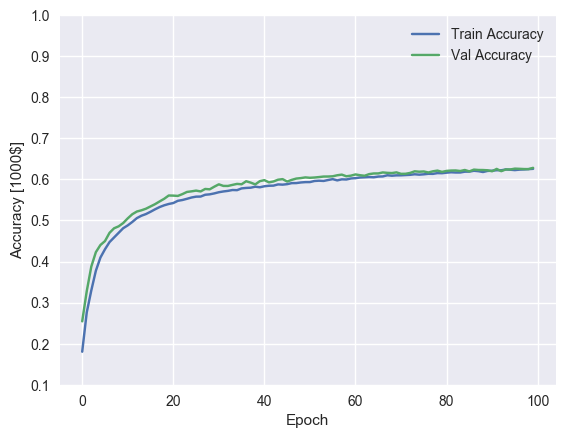

In [392]:
#Visualizing the results
import matplotlib.pyplot as plt
def plot_history(history_adam):
 plt.figure()
 plt.xlabel('Epoch')
 plt.ylabel('Accuracy [1000$]')
 plt.plot(history_adam.epoch, np.array(history_adam.history['acc']),
 label='Train Accuracy')
 plt.plot(history_adam.epoch, np.array(history_adam.history['val_acc']),
 label = 'Val Accuracy')
 plt.legend()
 plt.ylim([0.1, 1])
plot_history(history_adam)
plt.show()

In [409]:
import matplotlib.pyplot as plt
def plot_history(history_adam):
 plt.figure()
 plt.xlabel('Epoch')
 plt.ylabel('Loss [1000$]')
 plt.plot(history_adam.epoch, np.array(history_adam.history['loss']),
 label='Train Loss')
 plt.plot(history_adam.epoch, np.array(history_adam.history['val_loss']),
 label = 'Val Loss')
 plt.legend()
 plt.ylim([0.5, 5])
plot_history(history_adam)


In [ ]:
'''Above model can be enhanced furthur by adjusting other hyperparameters or making some changes in input data.'''

In [ ]:
'''Furthur Analysis: We can also use machine learning model to analyze text summary data, to find useful insights.'''